Determine a polynomial $f(x)$ of degree 3 from the following information:

- $f(x)$ has a stationary point at $P(0|4)$
- $f(x)$ has an inflection point at $Q(2|2)$

Plot the graph of the resulting function for $-2.1 \le x \le 6.1$.

## Solution

The first step consists of some initialisations

In [1]:
# Initialisations
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina' # for OSX only

import numpy as np

from IPython.display import display, Math

from fun_expr import Function_from_Expression as FE

Then, the function $f(x)$ is defined as

$$
  f(x) = a\,x^3 + b\,x^2 + c\,x + d
$$

with unknown coefficients $a\cdots d$.

In [2]:
# define f

x = Symbol('x')

a,b,c,d = symbols('a,b,c,d')

f = FE(x, a*x**3 + b*x**2 + c*x + d)
f_1 = f.diff(x)
f_2 = f.diff(x,2)

display(Math("f(x)="+latex(f(x))))
display(Math("f'(x)="+latex(f_1(x))))
display(Math("f''(x)="+latex(f_2(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The unknown coefficients are determined by the conditions

\begin{align*}
  f(x_s) &= y_s \\
  f(x_i) &= y_i \\
  f'(x_s) &= 0 \\
  f''(x_i) &= 0 \\
\end{align*}

Here, $(x_s|y_s)$ is the stationary point and $(x_i|y_i)$ the inflection point.

In [3]:
# known information
x_s, y_s = 0,4
x_i, y_i = 2,2
p_s = (x_s,y_s) # stationary point
p_i = (x_i,y_i) # inflection point

# equations
eqns = [Eq(f(x_s),y_s), 
        Eq(f_1(x_s),0),
        Eq(f(x_i),y_i),
        Eq(f_2(x_i),0)]

for eq in eqns:
    display(eq)

The resulting system of equations is solved

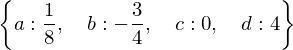

In [4]:
# solve equations
sol = solve(eqns)
sol

... and the solution substituted into $f$, $f'$ and $f''$.

In [5]:
# substitute solution
f = f.subs(sol)
f_1 = f_1.subs(sol)
f_2 = f_2.subs(sol)
display(Math('f(x)='+latex(f(x))))
display(Math("f'(x)="+latex(f_1(x))))
display(Math("f''(x)="+latex(f_2(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The resulting function $f(x)$ is plotted over $-2.1 \le x \le 6.1$ 

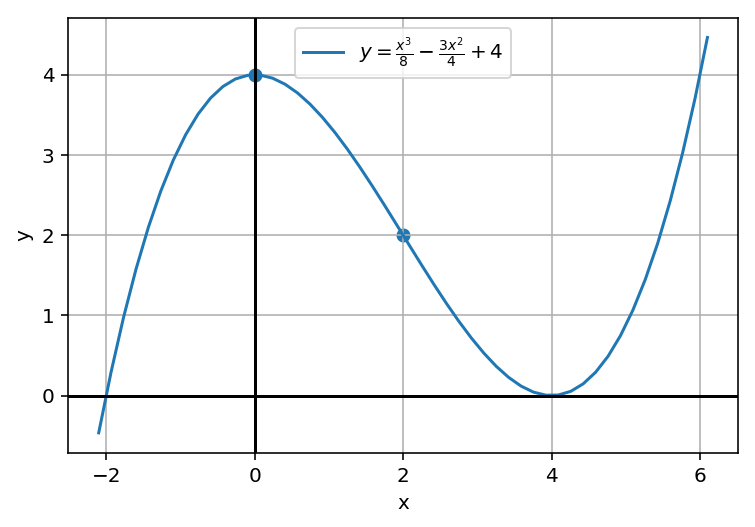

In [6]:
# define new plot
fig, ax = plt.subplots()

# x-values
lx = np.linspace(-2.1,6.1)

# plot
ax.plot(lx,f.lambdified(lx),label=r'$y={f}$'.format(f=latex(f(x))))
ax.scatter(*zip(*[p_s,p_i]))

# refine plot
ax.axhline(0,c='k')
ax.axvline(0,c='k')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')

# show plot
plt.show()